In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses=cv2.imread(r'C:\Users\Kartikay Raheja\Downloads\udemy opencv\Computer-Vision-with-Python\DATA\reeses_puffs.png',0)

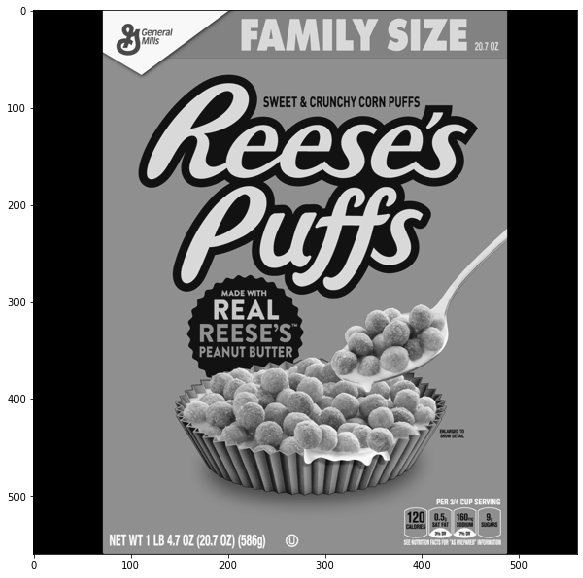

In [4]:
display(reeses)

In [5]:
cereals=cv2.imread(r'C:\Users\Kartikay Raheja\Downloads\udemy opencv\Computer-Vision-with-Python\DATA\many_cereals.jpg',0)

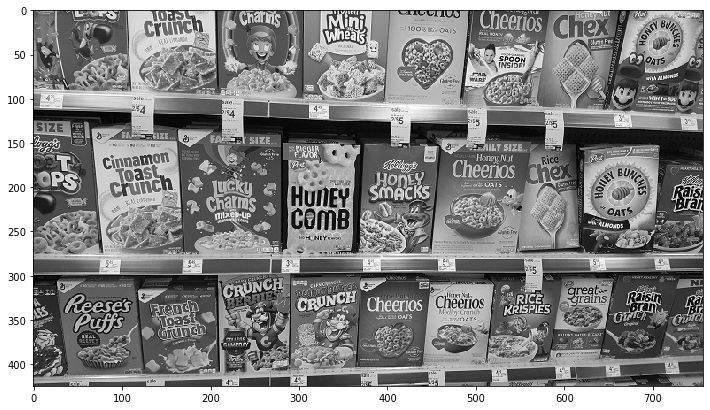

In [6]:
display(cereals)

In [7]:
#brute force detection

orb=cv2.ORB_create()

In [8]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [9]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches=bf.match(des1,des2)

In [11]:
matches=sorted(matches,key=lambda x:x.distance)

In [12]:
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

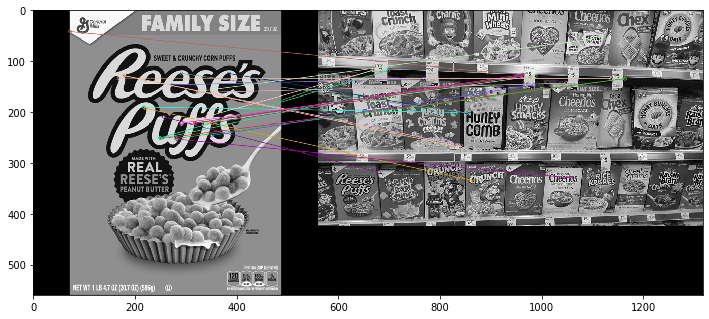

In [13]:
display(reeses_matches)

In [16]:
sift=cv2.xfeatures2d.SIFT_create()

In [18]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [19]:
bf=cv2.BFMatcher()

In [20]:
matches=bf.knnMatch(des1,des2,k=2)

In [25]:
good=[]
for match1,match2 in matches:
    if match1.distance<0.75*match2.distance:
        good.append([match1])

In [27]:
sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

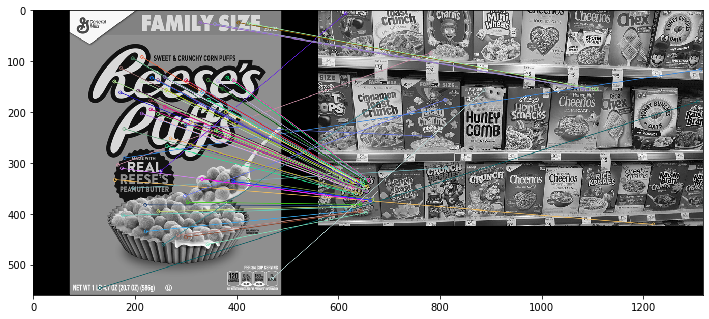

In [28]:
display(sift_matches)

In [29]:
#flann

FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params=dict(checks=50)

In [31]:
flann=cv2.FlannBasedMatcher(index_params,search_params)
matches=flann.knnMatch(des1,des2,k=2)

In [32]:
good=[]

for match1,match2 in matches:
    if match1.distance<0.7*match2.distance:
        good.append([match1])

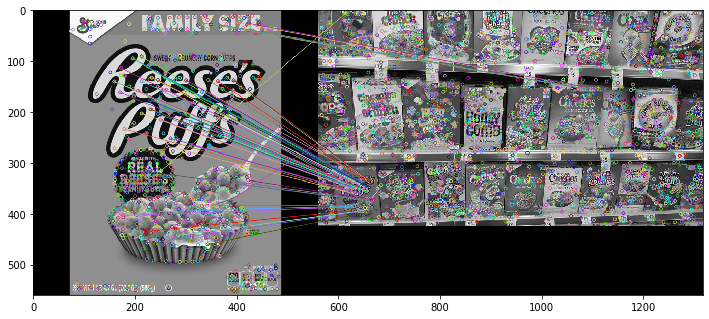

In [39]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)
display(flann_matches)

In [40]:
matchesMask=[[0,0] for i in range(len(matches))]


In [41]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance<0.7*match2.distance:
        matchesMask[i]=[1,0]

In [45]:
draw_params={'matchColor':(0,255,0),
            'singlePointColor':(255,0,0),
            'matchesMask':matchesMask,'flags':2}

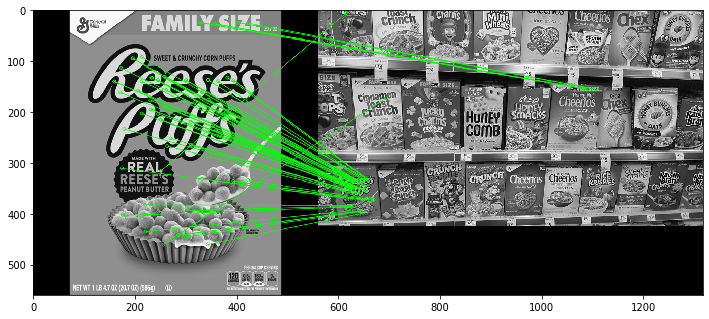

In [46]:
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)